# Automating GIS Processes Lesson 3
## Lesson 3.1 - Geocoding
**Geocoding** is the process of transforming place names or addresses into geographic coordinates. In Python we can use `geopy` which works in conjuction with `geopandas`, there are in the background a number of geocoder services that look up addresses for us. It will find an address and return the point to me. We use `nominatim`

Lesson link is [here](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html)

In [3]:
!pip install geopy

     -------------------------------------- 125.4/125.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [95]:
import geopy
import pathlib
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Line, LineString
import matplotlib.pyplot as plt

ImportError: cannot import name 'Line' from 'shapely.geometry' (C:\Users\rajan\anaconda3\envs\IML_env\lib\site-packages\shapely\geometry\__init__.py)

Set up the path

In [27]:
DATA_PATH = pathlib.Path().resolve() / "data"

Load the list of addresses

In [25]:
addresses = pd.read_csv(DATA_PATH  / "helsinki_addresses" /  "addresses.txt", sep = ';')

In [26]:
addresses.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


Now geocode the addresses using Nominatim. The geocode function takes a column from the data frame

In [20]:
# Import the geocoding tools
from geopandas.tools import geocode

# Geocode the addresses using Nominatim. We need to 
# provide a custom application name in the user_agent parameter
geo = geocode(addresses["addr"], 
        provider = "nominatim",
        user_agent = "Yale Tobin Center",
        timeout = 20)

In [69]:
geo.head()

,geometry,address
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Salmisaari, Ruoh..."
1,POINT (24.93166 60.16905),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,POINT (24.94179 60.16989),"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust..."
3,POINT (24.97683 60.18667),"Hermannin rantatie, Suvilahti, Kalasatama, Sör..."
4,POINT (24.92169 60.15667),"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E..."


In [74]:
geoms

0     POINT (384320.898 6671412.395)
1     POINT (385234.571 6672035.181)
2     POINT (385799.393 6672111.459)
3     POINT (387800.483 6673920.015)
4     POINT (384637.798 6670674.653)
5     POINT (393774.333 6679151.035)
6     POINT (395344.432 6677608.348)
7     POINT (390960.130 6684050.842)
8     POINT (390930.681 6682408.475)
9     POINT (382216.258 6678066.859)
10    POINT (385853.743 6672253.074)
11    POINT (382821.379 6678960.255)
12    POINT (382542.960 6680048.502)
13    POINT (386354.187 6677897.461)
14    POINT (390019.028 6681029.073)
15    POINT (383326.415 6677463.573)
16    POINT (381933.054 6681356.240)
17    POINT (387329.020 6678742.358)
18    POINT (385486.638 6675317.532)
19    POINT (381494.764 6678283.444)
20    POINT (388924.302 6680234.980)
21    POINT (390873.280 6680041.286)
22    POINT (393508.460 6676331.148)
23    POINT (396657.089 6675959.510)
24    POINT (392412.030 6677890.337)
25    POINT (395327.387 6679403.408)
26    POINT (386931.498 6674095.572)
2

Note, we may get rate limited. That is explained on the course webpage [here](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html). A manual way to deal with this would be to go in blocks of rows, and then wait between each fetch.

Now, let's try to plot these on our map of Finland

In [72]:
# We extract the geometries, and project them to the 
# same geometry being used by the municipalities map.
geoms = geo["geometry"]
geoms = geoms.to_crs("EPSG:3067")

# We get the x and y max and min
geoms_x_min = geoms.bounds["minx"].min()
geoms_x_max = geoms.bounds["maxx"].max()
geoms_y_min = geoms.bounds["miny"].min()
geoms_y_max = geoms.bounds["maxy"].max()

In [47]:
finland = gpd.read_file(DATA_PATH / "finland_municipalities_2021.gpkg")

In [53]:
finland["geometry"].crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

This is too large, can't see the addresses. Let's zoom in afterwards.

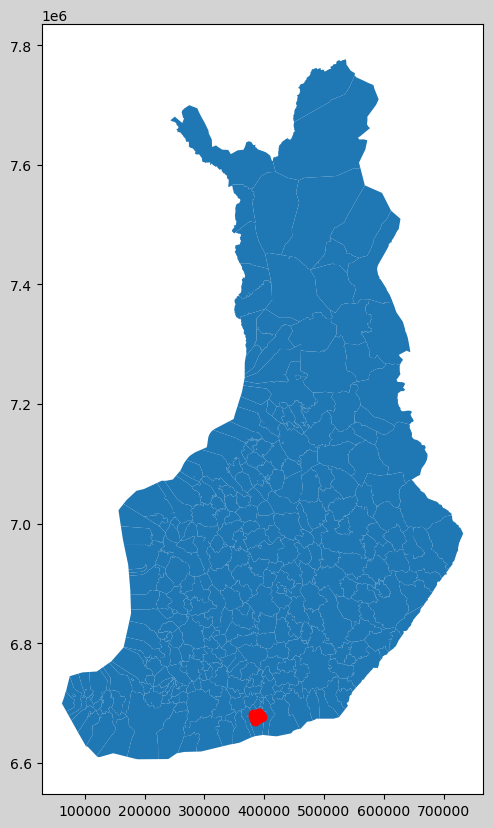

In [58]:
fig, ax = plt.subplots(nrows =1, 
                       ncols= 1,
                       figsize = (10,10),
                       facecolor = 'lightgrey')
finland.plot(ax=ax)
geoms.plot(ax=ax, color = 'red')
plt.show()

Zoom in - we do this in the same way we normally operate on Axes

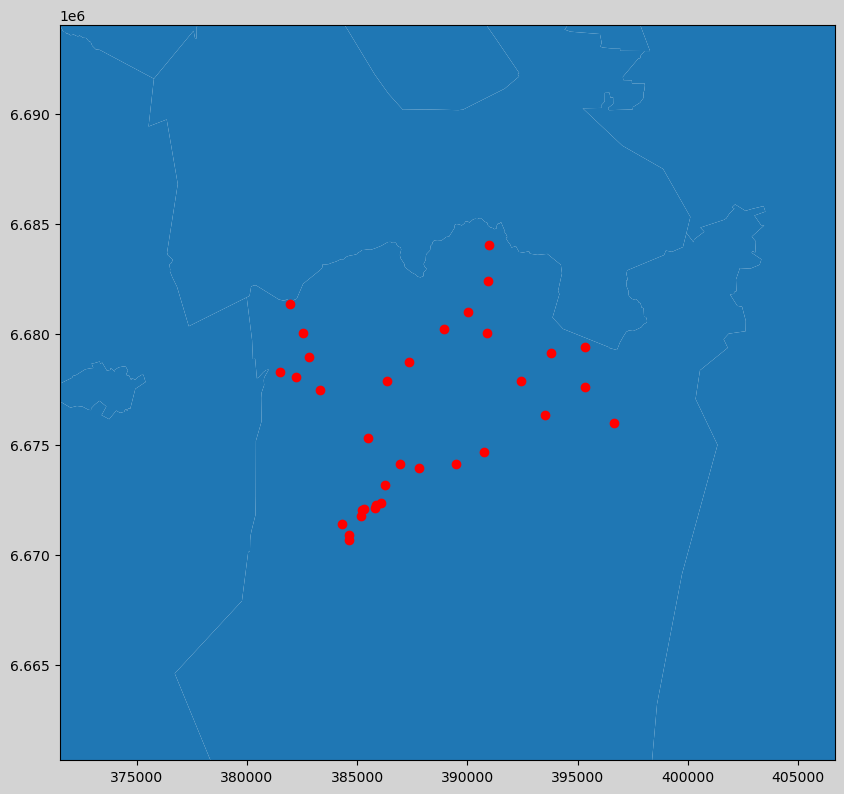

In [79]:
fig, ax = plt.subplots(nrows =1, 
                       ncols= 1,
                       figsize = (10,10),
                       facecolor = 'lightgrey')
finland.plot(ax=ax)
geoms.plot(ax=ax, color = 'red')
ax.set_xlim(geoms_x_min-10000,geoms_x_max+10000)
ax.set_ylim(geoms_y_min-10000,geoms_y_max+10000)

plt.show()

# Joining Data Frames

In [81]:
# Join the two dataframes - one with and one without the points
joined = addresses.join(geo)
joined.head()

,id,addr,geometry,address
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland",POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Salmisaari, Ruoh..."
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland",POINT (24.93166 60.16905),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland",POINT (24.94179 60.16989),"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust..."
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland",POINT (24.97683 60.18667),"Hermannin rantatie, Suvilahti, Kalasatama, Sör..."
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",POINT (24.92169 60.15667),"9, Tyynenmerenkatu, Jätkäsaari, Länsisatama, E..."


Notice that the addresses are not the same - because when we provide it to the service, it returns the address that is closest in their database.

In [82]:
# Because we start with normal data, and join a GDF
# Our output is a standard DataFrame instead of a GDF
# If we did it the other way, we would have ended up with a GDF
type(joined)

pandas.core.frame.DataFrame

## Lesson 3.2 - Spatial queries and spatial joins

In [83]:
from shapely.geometry import Point, Polygon

# Create points
point1 = Point(24.952242, 60.1696017)
point2 = Point(24.976567, 60.1612500)

# Create polygon
polygon = Polygon(
    [
        (24.950899, 60.169158),
        (24.953492, 60.169158),
        (24.953510, 60.170104),
        (24.950958, 60.169990)
    ]
)

We use `within` and `contains` which do the obvious things

In [87]:
# We can check if p1 is within the polygon using the 
# within method of the point
point1.within(polygon)

True

In [88]:
point2.within(polygon)

False

In [92]:
polygon.contains(point1)

True

Therefore we see that `within` and `contains` are the inverse of one another - but can be used to do effectively the same thing.

### Intersect analyses
Check if a geometry intersects or touches another one. There are binary operations to check these

In [93]:
from shapely.geometry import Point

line1 = shapely.geometry.LineString([(0, 0), (1, 1)])
line2 = shapely.geometry.LineString([(1, 1), (0, 2)])

NameError: name 'shapely' is not defined